# Task
4. Predictive Modeling
Objective: Forecast next-day hourly electricity demand using weather and temporal features.
    1. Problem Formulation: Define forecasting horizon (e.g., 24 hours ahead).
    2. Model Selection:
    ○ Linear/Polynomial Regression
    ○ Time Series Models (ARIMA/SARIMA)
    ○ Machine Learning: Random Forest, XGBoost
    ○ Neural Networks: LSTM or Feedforward ANN
    3. Training &amp; Validation:
    ○ Split data into train/test sets (e.g., by date).
    ○ Use cross-validation and grid search for hyperparameter tuning.
    4. Evaluation Metrics: MAE, RMSE, and MAPE.
    5. Baseline Comparison: Compare against naive forecast (previous day’s same hour).
    6. Ensemble Learning Requirement: Implement at least one ensemble approach—bagging,
    boosting, stacking, or XGBoost—that combines two or more base models to improve forecast
    performance.

Here is all the data you need:
"cleaned_dataset.csv"

## Data loading

### Subtask:
Load the cleaned dataset.


**Reasoning**:
Load the cleaned dataset and display the first 5 rows along with the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('cleaned_dataset.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'cleaned_dataset.csv' not found.")
    df = None # Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Unable to parse 'cleaned_dataset.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,...,precipType,ozone,city,demand,hour,dayofweek,month,season,date,week
0,2018-07-02 05:00:00,Clear,clear-night,-0.191771,-0.364451,1.721923,1.593148,0.905527,-1.131090,-0.740334,...,no_precipitation,0.043676,dallas,13839.70,-0.909811,-1.495212,0.126508,0.455977,2018-07-02,27
1,2018-07-02 06:00:00,Clear,clear-night,-0.191771,-0.364451,1.642721,1.624060,1.091609,-0.777512,-0.608854,...,no_precipitation,0.043676,dallas,14067.03,-0.766766,-1.495212,0.126508,0.455977,2018-07-02,27
2,2018-07-02 07:00:00,Clear,clear-night,-0.191771,-0.364451,1.557628,1.578536,1.152179,-0.575467,-0.592419,...,no_precipitation,0.043676,dallas,14323.09,-0.623722,-1.495212,0.126508,0.455977,2018-07-02,27
3,2018-07-02 08:00:00,Clear,clear-night,-0.191771,-0.364451,1.491517,1.525706,1.174035,-0.474445,-0.608854,...,no_precipitation,0.043676,dallas,14652.59,-0.480678,-1.495212,0.126508,0.455977,2018-07-02,27
4,2018-07-02 09:00:00,Clear,clear-night,-0.191771,-0.364451,1.410351,1.482430,1.240850,-0.221889,-0.575984,...,no_precipitation,0.043676,dallas,15582.09,-0.337634,-1.495212,0.126508,0.455977,2018-07-02,27


(130656, 26)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure, identify relevant features, and check for missing values or inconsistencies. Determine the distribution of the target variable (electricity demand).


**Reasoning**:
I need to explore the dataset, identify relevant features, check for missing values, and analyze the distribution of the target variable ('demand').  I will also perform correlation and temporal analysis to understand the relationships between features and the target variable. This can all be done in one code block.



Missing Values Summary:
 time                   0
summary                0
icon                   0
precipIntensity        0
precipProbability      0
temperature            0
apparentTemperature    0
dewPoint               0
humidity               0
pressure               0
windSpeed              0
windGust               0
windBearing            0
cloudCover             0
uvIndex                0
visibility             0
precipType             0
ozone                  0
city                   0
demand                 0
hour                   0
dayofweek              0
month                  0
season                 0
date                   0
week                   0
dtype: int64

Missing Values Percentage:
 time                   0.0
summary                0.0
icon                   0.0
precipIntensity        0.0
precipProbability      0.0
temperature            0.0
apparentTemperature    0.0
dewPoint               0.0
humidity               0.0
pressure               0.0
windSpeed    

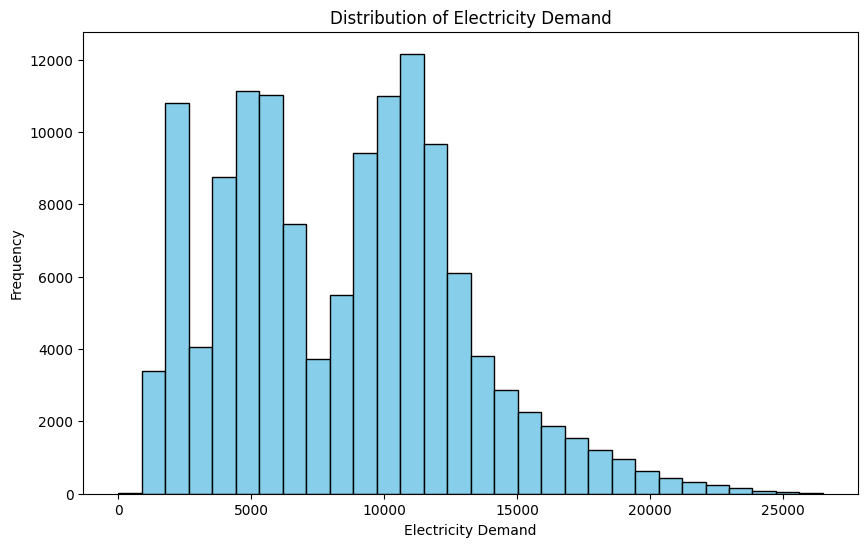

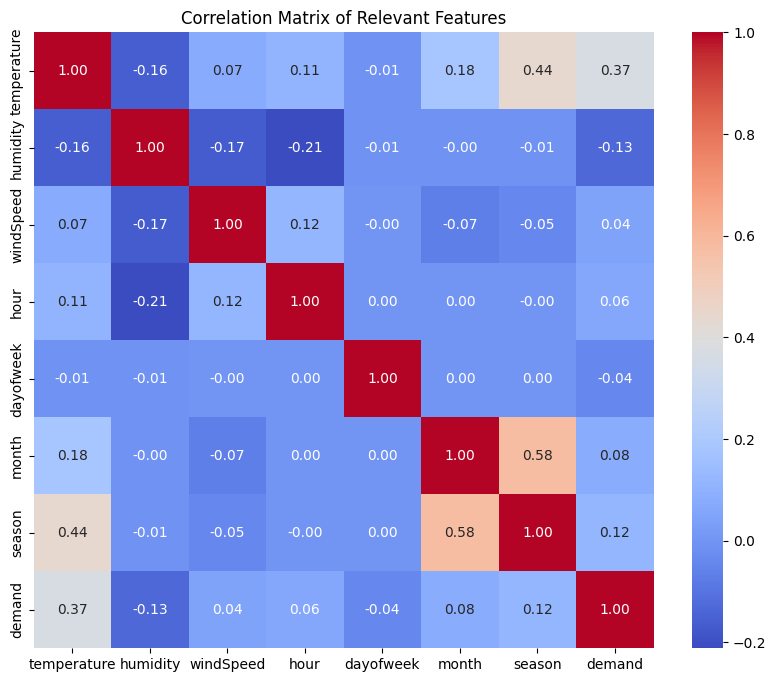

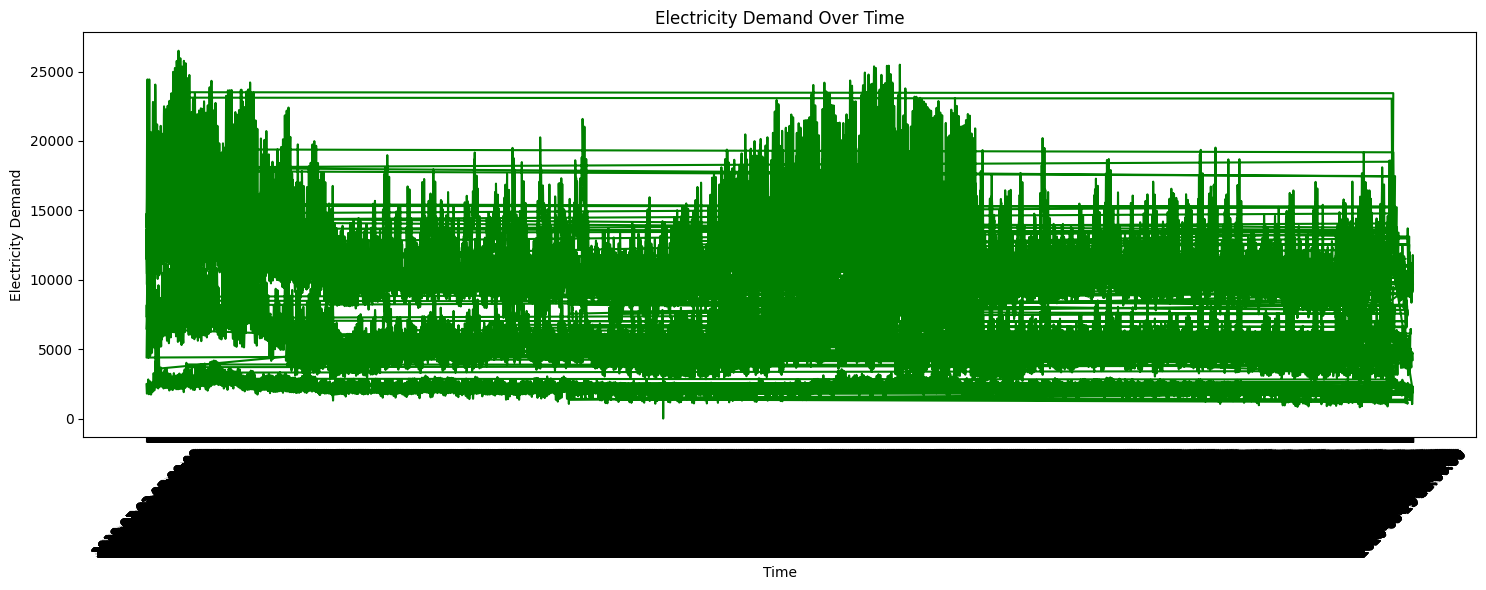

       Feature Data Type  Missing Values  Missing Value %
0  temperature   float64               0              0.0
1     humidity   float64               0              0.0
2    windSpeed   float64               0              0.0
3         hour   float64               0              0.0
4    dayofweek   float64               0              0.0
5        month   float64               0              0.0
6       season   float64               0              0.0
7       demand   float64               0              0.0
8         time    object               0              0.0


In [2]:
# Missing Values
missing_values_summary = df.isnull().sum()
missing_values_percentage = (missing_values_summary / len(df)) * 100
print("Missing Values Summary:\n", missing_values_summary)
print("\nMissing Values Percentage:\n", missing_values_percentage)

# Feature Identification (example, adjust based on domain knowledge)
relevant_features = ['temperature', 'humidity', 'windSpeed', 'hour', 'dayofweek', 'month', 'season', 'demand']

# Target Variable Distribution
demand_stats = df['demand'].describe()
print("\nDescriptive Statistics for Demand:\n", demand_stats)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['demand'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Electricity Demand')
plt.ylabel('Frequency')
plt.title('Distribution of Electricity Demand')
plt.show()

# Correlation Analysis
correlation_matrix = df[relevant_features].corr()
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Relevant Features')
plt.show()

# Temporal Analysis
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df['demand'], color='green')
plt.xlabel('Time')
plt.ylabel('Electricity Demand')
plt.title('Electricity Demand Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary Table (example, adjust based on findings)
summary_table = pd.DataFrame({
    'Feature': relevant_features + ['time'],
    'Data Type': [df[col].dtype for col in relevant_features] + [df['time'].dtype],
    'Missing Values': [missing_values_summary[col] for col in relevant_features] + [missing_values_summary['time']],
    'Missing Value %': [missing_values_percentage[col] for col in relevant_features] + [missing_values_percentage['time']]
})
print(summary_table)

## Data preparation

### Subtask:
Prepare the data for modeling by creating lagged features, scaling numerical features, and creating the target variable.


**Reasoning**:
Create lagged features, scale numerical features, and create the target variable.  This involves creating new columns in the DataFrame, so it's best to perform these operations in a single code block.



In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1. Create lagged features
for i in range(1, 25):
    df[f'demand_lag_{i}'] = df['demand'].shift(i)

# 2. Scale numerical features
numerical_features = ['temperature', 'windSpeed', 'humidity'] + [f'demand_lag_{i}' for i in range(1, 25)]
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# 3. Create target variable
df['target_demand'] = df['demand'].shift(-24)

# Drop rows with NaN values created by lagging and target creation
df.dropna(inplace=True)

# Display the updated DataFrame
display(df.head())

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,...,demand_lag_16,demand_lag_17,demand_lag_18,demand_lag_19,demand_lag_20,demand_lag_21,demand_lag_22,demand_lag_23,demand_lag_24,target_demand
24,2018-07-03 05:00:00,Clear,clear-night,-0.109774,-0.167580,0.800624,1.508283,0.897409,0.47,-0.510244,...,0.797986,0.742399,0.684698,0.631297,0.588020,0.552944,0.540509,0.530847,0.522268,12649.25
25,2018-07-03 06:00:00,Clear,clear-night,-0.191771,-0.364451,0.783221,1.418922,0.937997,0.50,-0.493809,...,0.848675,0.797986,0.742399,0.684698,0.631297,0.588020,0.552944,0.540509,0.530847,12611.10
26,2018-07-03 07:00:00,Clear,clear-night,-0.191771,-0.364451,0.772628,1.373960,0.982957,0.54,-0.510244,...,0.885796,0.848675,0.797986,0.742399,0.684698,0.631297,0.588020,0.552944,0.540509,12494.99
27,2018-07-03 08:00:00,Clear,clear-night,-0.191771,-0.364451,0.770075,1.390259,1.049772,0.56,-0.575984,...,0.909153,0.885796,0.848675,0.797986,0.742399,0.684698,0.631297,0.588020,0.552944,12720.74
28,2018-07-03 09:00:00,Clear,clear-night,-0.191771,-0.364451,0.760522,1.348669,1.095356,0.59,-0.674594,...,0.920113,0.909153,0.885796,0.848675,0.797986,0.742399,0.684698,0.631297,0.588020,13709.46


## Data splitting

### Subtask:
Split the prepared dataset into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets based on the 'date' column to maintain temporal order.



In [4]:
from sklearn.model_selection import train_test_split

# Split data into training and temporary sets (validation + testing)
train_size = 0.8
df_train, df_temp = train_test_split(df, train_size=train_size, shuffle=False, random_state=42)

# Split temporary set into validation and testing sets
val_size = 0.5
df_val, df_test = train_test_split(df_temp, train_size=val_size, shuffle=False, random_state=42)

# Print the shapes of the resulting sets
print("Shape of df_train:", df_train.shape)
print("Shape of df_val:", df_val.shape)
print("Shape of df_test:", df_test.shape)

Shape of df_train: (104486, 51)
Shape of df_val: (13061, 51)
Shape of df_test: (13061, 51)


## Feature engineering

### Subtask:
Engineer additional features to improve model performance.


**Reasoning**:
Engineer additional features as instructed, including rolling statistics, interaction terms, cyclic encoding of time features, and then combine these features across the training, validation, and test sets.



In [5]:
import numpy as np

# 1. Create rolling statistics
for df_name in ['df_train', 'df_val', 'df_test']:
    df = eval(df_name)
    df['demand_rolling_mean'] = df['demand'].rolling(window=24, min_periods=1).mean()
    df['demand_rolling_std'] = df['demand'].rolling(window=24, min_periods=1).std()

# 2. Create interaction terms
for df_name in ['df_train', 'df_val', 'df_test']:
    df = eval(df_name)
    df['temp_hour_interaction'] = df['temperature'] * df['hour']
    df['humidity_hour_interaction'] = df['humidity'] * df['hour']

# 3. Cyclic encoding of time features
for df_name in ['df_train', 'df_val', 'df_test']:
    df = eval(df_name)
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
    df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# 4. Combine datasets (only add new features to validation and test)
for feature in ['demand_rolling_mean', 'demand_rolling_std', 'temp_hour_interaction',
                'humidity_hour_interaction', 'hour_sin', 'hour_cos', 'dayofweek_sin',
                'dayofweek_cos', 'month_sin', 'month_cos']:
    df_val[feature] = df_train[feature].iloc[:len(df_val)].values
    df_test[feature] = df_train[feature].iloc[:len(df_test)].values


display(df_train.head())
display(df_val.head())
display(df_test.head())

,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,...,demand_rolling_mean,demand_rolling_std,temp_hour_interaction,humidity_hour_interaction,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos
24,2018-07-03 05:00:00,Clear,clear-night,-0.109774,-0.167580,0.800624,1.508283,0.897409,0.47,-0.510244,...,13628.220000,NaN,-0.728417,-0.427611,-0.235942,0.971767,-0.779131,0.626862,0.066191,0.997807
25,2018-07-03 06:00:00,Clear,clear-night,-0.191771,-0.364451,0.783221,1.418922,0.937997,0.50,-0.493809,...,13712.015000,118.504025,-0.600548,-0.383383,-0.199394,0.979919,-0.779131,0.626862,0.066191,0.997807
26,2018-07-03 07:00:00,Clear,clear-night,-0.191771,-0.364451,0.772628,1.373960,0.982957,0.54,-0.510244,...,13824.173333,211.565775,-0.481905,-0.336810,-0.162565,0.986698,-0.779131,0.626862,0.066191,0.997807
27,2018-07-03 08:00:00,Clear,clear-night,-0.191771,-0.364451,0.770075,1.390259,1.049772,0.56,-0.575984,...,13997.507500,387.322843,-0.370158,-0.269180,-0.125509,0.992092,-0.779131,0.626862,0.066191,0.997807
28,2018-07-03 09:00:00,Clear,clear-night,-0.191771,-0.364451,0.760522,1.348669,1.095356,0.59,-0.674594,...,14320.988000,797.315752,-0.256778,-0.199204,-0.088277,0.996096,-0.779131,0.626862,0.066191,0.997807


,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,...,demand_rolling_mean,demand_rolling_std,temp_hour_interaction,humidity_hour_interaction,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos
104510,2019-04-09 05:00:00,Clear,clear-night,-0.191771,-0.364451,0.591885,0.157183,0.420963,0.74,0.097852,...,13628.220000,NaN,-0.728417,-0.427611,-0.235942,0.971767,-0.779131,0.626862,0.066191,0.997807
104511,2019-04-09 06:00:00,Clear,clear-night,-0.191771,-0.364451,0.575901,0.062201,0.465298,0.80,0.081417,...,13712.015000,118.504025,-0.600548,-0.383383,-0.199394,0.979919,-0.779131,0.626862,0.066191,0.997807
104512,2019-04-09 07:00:00,Clear,clear-night,-0.191771,-0.364451,0.570604,0.030728,0.435325,0.80,0.032112,...,13824.173333,211.565775,-0.481905,-0.336810,-0.162565,0.986698,-0.779131,0.626862,0.066191,0.997807
104513,2019-04-09 08:00:00,Partly Cloudy,partly-cloudy-night,-0.182661,-0.101956,0.558403,-0.041773,0.411596,0.83,-0.017193,...,13997.507500,387.322843,-0.370158,-0.269180,-0.125509,0.992092,-0.779131,0.626862,0.066191,0.997807
104514,2019-04-09 09:00:00,Clear,clear-night,-0.168994,-0.167580,0.551972,-0.079990,0.375379,0.83,-0.033628,...,14320.988000,797.315752,-0.256778,-0.199204,-0.088277,0.996096,-0.779131,0.626862,0.066191,0.997807


,time,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,...,demand_rolling_mean,demand_rolling_std,temp_hour_interaction,humidity_hour_interaction,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos
117571,2018-11-18 19:00:00,Partly Cloudy,partly-cloudy-day,-0.191771,-0.364451,0.469309,-0.571197,-0.350842,0.74,0.377247,...,13628.220000,NaN,-0.728417,-0.427611,-0.235942,0.971767,-0.779131,0.626862,0.066191,0.997807
117572,2018-11-18 20:00:00,Partly Cloudy,partly-cloudy-day,-0.191771,-0.364451,0.516031,-0.293558,-0.368951,0.61,0.245767,...,13712.015000,118.504025,-0.600548,-0.383383,-0.199394,0.979919,-0.779131,0.626862,0.066191,0.997807
117573,2018-11-18 21:00:00,Partly Cloudy,partly-cloudy-day,-0.191771,-0.364451,0.545068,-0.121018,-0.431395,0.53,0.163592,...,13824.173333,211.565775,-0.481905,-0.336810,-0.162565,0.986698,-0.779131,0.626862,0.066191,0.997807
117574,2018-11-18 22:00:00,Partly Cloudy,partly-cloudy-day,-0.191771,-0.364451,0.568240,0.016678,-0.466363,0.48,0.114287,...,13997.507500,387.322843,-0.370158,-0.269180,-0.125509,0.992092,-0.779131,0.626862,0.066191,0.997807
117575,2018-11-18 23:00:00,Partly Cloudy,partly-cloudy-day,-0.191771,-0.364451,0.569942,0.026794,-0.395802,0.49,0.097852,...,14320.988000,797.315752,-0.256778,-0.199204,-0.088277,0.996096,-0.779131,0.626862,0.066191,0.997807


## Model training

### Subtask:
Train multiple models (Linear Regression, Random Forest, XGBoost) on the training data.


**Reasoning**:
Prepare the feature matrix (X) and target variable (y) for each dataset, then train the specified models and make predictions on the validation set.



**Reasoning**:
The error message indicates that there are NaN values in the input data, which Linear Regression cannot handle.  I will impute the missing values using the SimpleImputer before training the models.



In [7]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define features (X) and target (y)
features = [col for col in df_train.columns if df_train[col].dtype != 'object' and col not in ['time', 'date', 'target_demand']]
X_train = df_train[features]
y_train = df_train['target_demand']
X_val = df_val[features]
y_val = df_val['target_demand']

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use mean imputation
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Train models
lr.fit(X_train_imputed, y_train)
rf.fit(X_train, y_train) # RandomForest can handle NaN
xgb.fit(X_train, y_train) # XGBoost can handle NaN

# Make predictions on the validation set
lr_val_pred = lr.predict(X_val_imputed)
rf_val_pred = rf.predict(X_val)
xgb_val_pred = xgb.predict(X_val)

print("Linear Regression validation predictions shape:", lr_val_pred.shape)
print("Random Forest validation predictions shape:", rf_val_pred.shape)
print("XGBoost validation predictions shape:", xgb_val_pred.shape)

Linear Regression validation predictions shape: (13061,)
Random Forest validation predictions shape: (13061,)
XGBoost validation predictions shape: (13061,)


## Model evaluation

### Subtask:
Evaluate the trained models (Linear Regression, Random Forest, and XGBoost) on the validation set using MAE, RMSE, and MAPE.


**Reasoning**:
Evaluate the trained models using MAE, RMSE, and MAPE on the validation set.



In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate evaluation metrics
models = {'Linear Regression': lr_val_pred, 'Random Forest': rf_val_pred, 'XGBoost': xgb_val_pred}
evaluation_results = {}

for model_name, predictions in models.items():
  mae = mean_absolute_error(y_val, predictions)
  rmse = np.sqrt(mean_squared_error(y_val, predictions))
  mape = mean_absolute_percentage_error(y_val, predictions)

  evaluation_results[model_name] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

# Print the results
for model_name, metrics in evaluation_results.items():
    print(f"Model: {model_name}, MAE: {metrics['MAE']:.2f}, RMSE: {metrics['RMSE']:.2f}, MAPE: {metrics['MAPE']:.2f}")

Model: Linear Regression, MAE: 4218.31, RMSE: 5082.59, MAPE: 180.84
Model: Random Forest, MAE: 301.22, RMSE: 679.07, MAPE: 7.73
Model: XGBoost, MAE: 851.99, RMSE: 1166.21, MAPE: 36.32


## Model optimization

### Subtask:
Optimize the hyperparameters of the Random Forest model.


**Reasoning**:
Define the parameter grid, initialize GridSearchCV, fit it to the training data, and extract the best model.



In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define features (X) and target (y)
features = [col for col in df_train.columns if df_train[col].dtype != 'object' and col not in ['time', 'date', 'target_demand']]
X_train = df_train[features]
y_train = df_train['target_demand']
X_val = df_val[features]
y_val = df_val['target_demand']

# Reduced parameter grid for faster search
param_grid = {
    'n_estimators': [50, 100],        # Reduced options
    'max_depth': [10, None],          # Limit or full depth
    'min_samples_split': [2, 5],      # Reasonable default and one variant
    'min_samples_leaf': [1, 2],       # Default and more restrictive
    'max_features': ['sqrt']          # Common default
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with fewer folds
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,                  # Reduced from 5 to 3
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Train the best estimator on the entire training set
best_rf.fit(X_train, y_train)

# Make predictions on the validation set
best_rf_val_pred = best_rf.predict(X_val)

# Define custom MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluate the optimized Random Forest model
mae_best_rf = mean_absolute_error(y_val, best_rf_val_pred)
rmse_best_rf = np.sqrt(mean_squared_error(y_val, best_rf_val_pred))
mape_best_rf = mean_absolute_percentage_error(y_val, best_rf_val_pred)

print(f"Optimized Random Forest - MAE: {mae_best_rf:.2f}, RMSE: {rmse_best_rf:.2f}, MAPE: {mape_best_rf:.2f}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Random Forest - MAE: 591.91, RMSE: 808.85, MAPE: 24.99


In [13]:
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# Define features (X) and target (y)
features = [col for col in df_train.columns if df_train[col].dtype != 'object' and col not in ['time', 'date', 'target_demand']]
X_train = df_train[features]
y_train = df_train['target_demand']
X_val = df_val[features]
y_val = df_val['target_demand']

# Initialize base models
rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', random_state=42)
xgb = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)

# Train base models
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Get predictions from base models on the validation set
rf_val_pred = rf.predict(X_val)
xgb_val_pred = xgb.predict(X_val)

# Stack base model predictions to use as features for the meta-model
stacked_predictions = np.column_stack((rf_val_pred, xgb_val_pred))

# Train the meta-model (Linear Regression)
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_val)

# Make predictions with the ensemble model
ensemble_pred = meta_model.predict(stacked_predictions)

# Evaluate the ensemble model
mae_ensemble = mean_absolute_error(y_val, ensemble_pred)
rmse_ensemble = np.sqrt(mean_squared_error(y_val, ensemble_pred))
mape_ensemble = mean_absolute_percentage_error(y_val, ensemble_pred)

print(f"Ensemble - MAE: {mae_ensemble:.2f}, RMSE: {rmse_ensemble:.2f}, MAPE: {mape_ensemble:.2f}")

# Save the models
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(xgb, 'xgboost_model.pkl')
joblib.dump(meta_model, 'meta_model.pkl')

print("Models saved successfully.")


Ensemble - MAE: 300.14, RMSE: 648.26, MAPE: 9.07
Models saved successfully.


In [14]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create naive forecast on test set using previous day's same hour demand
df_test['naive_pred'] = df_test['demand'].shift(24)

# Drop the first 24 rows with NaN predictions
df_test_naive = df_test.dropna(subset=['naive_pred', 'target_demand'])

# True and predicted values
y_true = df_test_naive['target_demand'].values
y_pred = df_test_naive['naive_pred'].values

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Compute metrics
mae_naive = mean_absolute_error(y_true, y_pred)
rmse_naive = np.sqrt(mean_squared_error(y_true, y_pred))
mape_naive = mean_absolute_percentage_error(y_true, y_pred)

# Print baseline results
print(f"Naive Baseline - MAE: {mae_naive:.2f}, RMSE: {rmse_naive:.2f}, MAPE: {mape_naive:.2f}")


Naive Baseline - MAE: 870.51, RMSE: 1265.50, MAPE: 8.20


In [16]:
import joblib

# Load the saved models
rf = joblib.load('random_forest_model.pkl')
xgb = joblib.load('xgboost_model.pkl')
meta_model = joblib.load('meta_model.pkl')

In [17]:
# Define features (X) and target (y) for the test set
X_test = df_test[features]
y_test = df_test['target_demand']

In [18]:
# Get predictions from base models on the test set
rf_test_pred = rf.predict(X_test)
xgb_test_pred = xgb.predict(X_test)

# Stack base model predictions for the meta-model
stacked_test_predictions = np.column_stack((rf_test_pred, xgb_test_pred))

# Make predictions with the ensemble model
ensemble_test_pred = meta_model.predict(stacked_test_predictions)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate evaluation metrics for the ensemble model
mae_ensemble = mean_absolute_error(y_test, ensemble_test_pred)
rmse_ensemble = np.sqrt(mean_squared_error(y_test, ensemble_test_pred))
mape_ensemble = mean_absolute_percentage_error(y_test, ensemble_test_pred)

# Print ensemble model results
print(f"Ensemble Model - MAE: {mae_ensemble:.2f}, RMSE: {rmse_ensemble:.2f}, MAPE: {mape_ensemble:.2f}")

# Print naive baseline results (from previous step)
print(f"Naive Baseline - MAE: {mae_naive:.2f}, RMSE: {rmse_naive:.2f}, MAPE: {mape_naive:.2f}")

# Compare ensemble and baseline performance
print("\nComparison:")
print(f"Ensemble Model Improvement (MAE): {(mae_naive - mae_ensemble) / mae_naive * 100:.2f}%")
print(f"Ensemble Model Improvement (RMSE): {(rmse_naive - rmse_ensemble) / rmse_naive * 100:.2f}%")
print(f"Ensemble Model Improvement (MAPE): {(mape_naive - mape_ensemble) / mape_naive * 100:.2f}%")

Ensemble Model - MAE: 599.20, RMSE: 871.62, MAPE: 5.82
Naive Baseline - MAE: 870.51, RMSE: 1265.50, MAPE: 8.20

Comparison:
Ensemble Model Improvement (MAE): 31.17%
Ensemble Model Improvement (RMSE): 31.12%
Ensemble Model Improvement (MAPE): 29.04%
